In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

(500, 2) (500,)


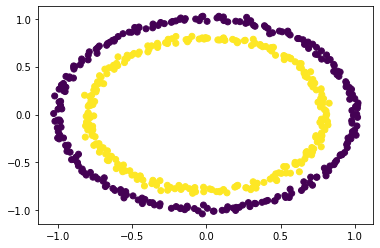

In [2]:
X, Y = make_circles(n_samples=500, noise=0.02)
print(X.shape, Y.shape)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [3]:
def phi(X) :
    '''Non Linear Transformation'''
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0], 3))
    print(X_.shape)
    X_[:, :-1] = X
    X_[:, -1] = X3
    
    return X_

In [5]:
X_ = phi(X)

(500, 3)


In [6]:
Y[Y == 0] = -1 # Broadcasting
print(Y)

[-1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1
  1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1
  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1
  1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1
 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1
  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1
 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1  1  1
 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1
  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1
  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1  1
 -1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1 -1
  1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1 -1 -1  1  1

In [134]:
class SVM :
    
    def __init__(self, C=1) : # C is penalty for outliers
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self, W, b, X, Y) :
        loss = 0.0
        
        loss += .5 * np.dot(W, W.T)
        
        m = X.shape[0]
        
        for i in range(m) :
            ti = Y[i] * (np.dot(W, X[i].T) + b) # W->1 x n, X[i]->1 x n
            loss += self.C * max(0, (1 - ti))
            
        return loss[0][0]
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, maxItr=500) :
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        # Initialise model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        
        # Initial loss
        # print(self.hingeLoss(W, bias, X, Y))
        
        # Training starts from here, update weight and bias
        losses = []
        
        for i in range(maxItr) :
            
            l = self.hingeLoss(W, bias, X, Y)
            losses.append(l)
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch Gradient Descent with random shuffling
            for batch_start in range(0, no_of_samples, batch_size) :
                # Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                # Iterate over all examples in mini batch
                for j in range(batch_start, batch_start + batch_size) :
                    if j < no_of_samples :
                        i = ids[j]
                        ti = Y[i] * (np.dot(W, X[i].T) + bias)
                        
                        if ti > 1 :
                            gradw += 0
                            gradb += 0
                        else :
                            gradw += c * Y[i] * X[i]
                            gradb += c * Y[i]
                    
                W = W - n * W + n * gradw
                bias = bias + n * gradb
                
        self.W = W
        self.b = bias
        return W, bias, losses
    
    def predict(self, Xtest) :
        
        m = Xtest.shape[0]
        
        Ytest = np.dot(W, Xtest.T) + b
        
        Ytest[Ytest >= 0] = 1
        Ytest[Ytest < 0] = -1
        
        return Ytest.reshape((m,)).astype('int8')

In [135]:
mySVM = SVM()

In [136]:
W, b, losses = mySVM.fit(X_, Y)

In [137]:
def plot3d(X, show=True) :
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X[:, 2]
    ax.scatter(X1, X2, X3, zdir='z', s=20, c=Y, depthshade=True)
    if show :
        plt.show()
    return ax

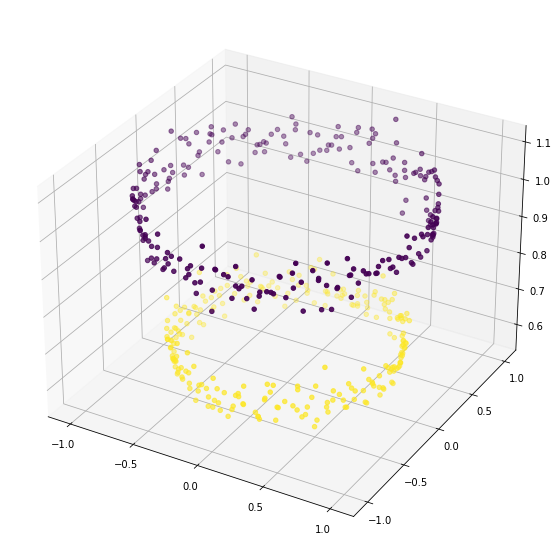

In [138]:
ax = plot3d(X_)

In [139]:
xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))
print(xx, yy, sep='\n')

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [140]:
W, b

(array([[ 0.02328162,  0.02195947, -5.77768736]]), 4.737999999999994)

In [141]:
zz = -(W[0, 0] * xx + W[0, 1] * yy + b) / W[0, 2]
print(zz)

[[0.80439067 0.80842025 0.81244982 0.8164794 ]
 [0.80819141 0.81222098 0.81625056 0.82028013]
 [0.81199215 0.81602172 0.82005129 0.82408087]
 [0.81579288 0.81982246 0.82385203 0.82788161]]


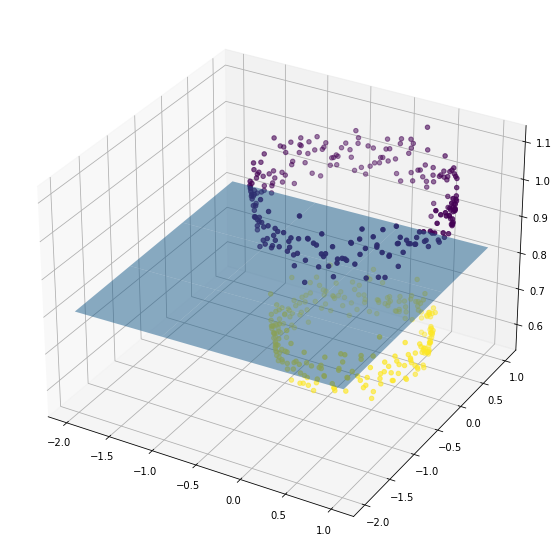

In [142]:
ax = plot3d(X_, False)
ax.plot_surface(xx, yy, zz, alpha=0.5)
plt.show()

In [143]:
prediction = mySVM.predict(X_)

In [144]:
X.shape

(500, 2)

In [145]:
print(prediction)
print(Y)

[-1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1
  1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1
  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1
  1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1
 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1
  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1
 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1  1  1
 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1
  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1
  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1  1
 -1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1 -1
  1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1 -1 -1  1  1

In [146]:
from sklearn.metrics import r2_score

In [147]:
print(r2_score(prediction, Y))

1.0
